<a href="https://colab.research.google.com/github/Aparajithashri/Covid_Analysis/blob/main/COVID_19_in_US_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COVID-19 in US Data analysis on 07-13-2020

##23/ 1/ 21

In [ ]:
#Google drive mounting

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

#Dataset Path
path = '/content/drive/My Drive/Assignment - Data Science/07-12-2020.csv'

In [ ]:
#Load data in pandas dataframe
data=pd.read_csv(path)
data.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-13 04:43:16,32.3182,-86.9023,53587,1121,25783.0,26683.0,1,1092.901859,511506.0,6745.0,2.091925,84000001,USA,10432.117083,12.587008
1,Alaska,US,2020-07-13 04:43:16,61.3707,-152.4044,1479,17,615.0,847.0,2,202.174849,145475.0,NaN,1.149425,84000002,USA,19885.994710,NaN
2,American Samoa,US,2020-07-13 04:43:16,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,816.0,NaN,NaN,16,ASM,1466.544455,NaN
3,Arizona,US,2020-07-13 04:43:16,33.7298,-111.4312,122467,2237,14829.0,105401.0,4,1682.535535,696172.0,5795.0,1.826615,84000004,USA,9564.487807,4.731887
4,Arkansas,US,2020-07-13 04:43:16,34.9697,-92.3731,28367,321,21591.0,6455.0,5,939.988150,382402.0,1822.0,1.131597,84000005,USA,12671.532015,6.422956


In [ ]:
data.shape

(58, 18)

In [ ]:
data.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [ ]:
data['ISO3'].value_counts()

USA    53
ASM     1
PRI     1
MNP     1
VIR     1
GUM     1
Name: ISO3, dtype: int64

In [ ]:
data.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,48.000000,58.000000,58.000000,56.000000,5.600000e+01,37.000000,57.000000,5.800000e+01,56.000000,37.000000
mean,36.840089,-85.206614,56981.758621,2331.120690,20965.125000,37300.189655,3288.086207,812.052441,7.193246e+05,7125.702703,3.321810,7.676194e+07,11606.026548,10.635990
std,10.887035,49.754449,82687.271523,4881.241293,27714.896166,69789.803064,17408.350591,502.766791,1.017488e+06,14929.232437,2.218287,2.378302e+07,4352.235379,4.294160
min,-14.271000,-170.132000,0.000000,0.000000,19.000000,0.000000,1.000000,0.000000,8.160000e+02,4.000000,0.000000,1.600000e+01,1466.544455,4.292397
25%,34.594600,-101.165775,6415.250000,110.250000,2538.750000,986.500000,18.250000,442.427333,1.364040e+05,1180.000000,1.649602,8.400001e+07,8736.204959,6.870028
50%,39.061850,-87.944200,28123.500000,683.000000,7735.500000,9858.000000,32.500000,774.144945,4.119060e+05,3250.000000,2.568093,8.400003e+07,10743.100941,10.401713
75%,42.361650,-76.970625,69400.500000,2629.250000,29036.000000,28791.250000,47.750000,1106.592729,8.341048e+05,7527.000000,4.539797,8.400004e+07,13735.422459,12.587008
max,61.370700,145.673900,401706.000000,32350.000000,132638.000000,317492.000000,99999.000000,2064.948417,5.406599e+06,89995.000000,9.194916,8.410000e+07,24022.311391,22.403200


In [ ]:
data.isna().any()

Province_State          False
Country_Region          False
Last_Update             False
Lat                      True
Long_                    True
Confirmed               False
Deaths                  False
Recovered                True
Active                  False
FIPS                    False
Incident_Rate            True
People_Tested            True
People_Hospitalized      True
Mortality_Rate           True
UID                     False
ISO3                    False
Testing_Rate             True
Hospitalization_Rate     True
dtype: bool

In [ ]:
data.isna().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               10
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     21
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    21
dtype: int64

#Data visualization

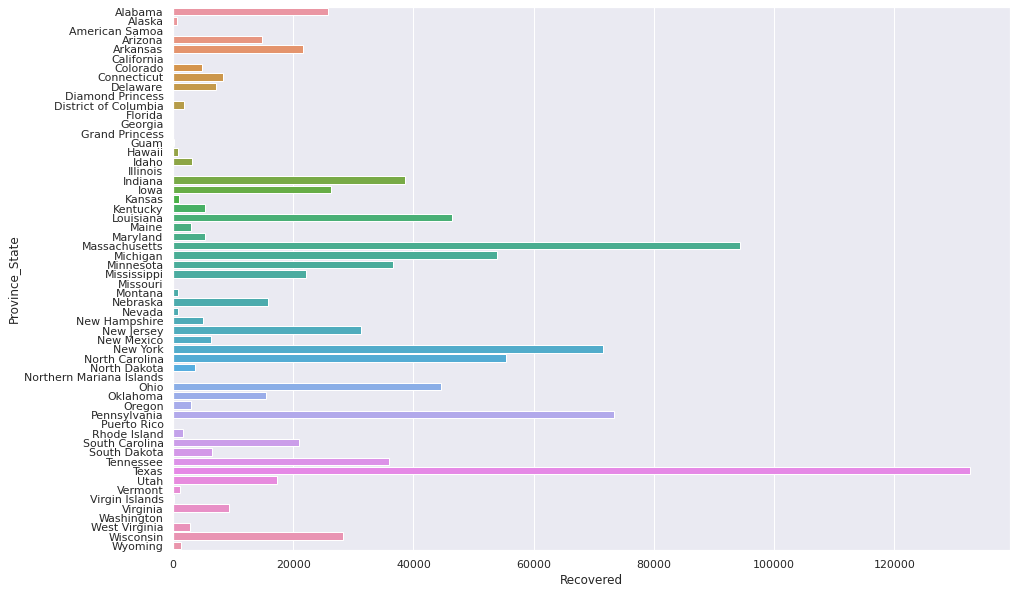

In [ ]:
sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x='Recovered',y='Province_State',data = data)
plt.show()

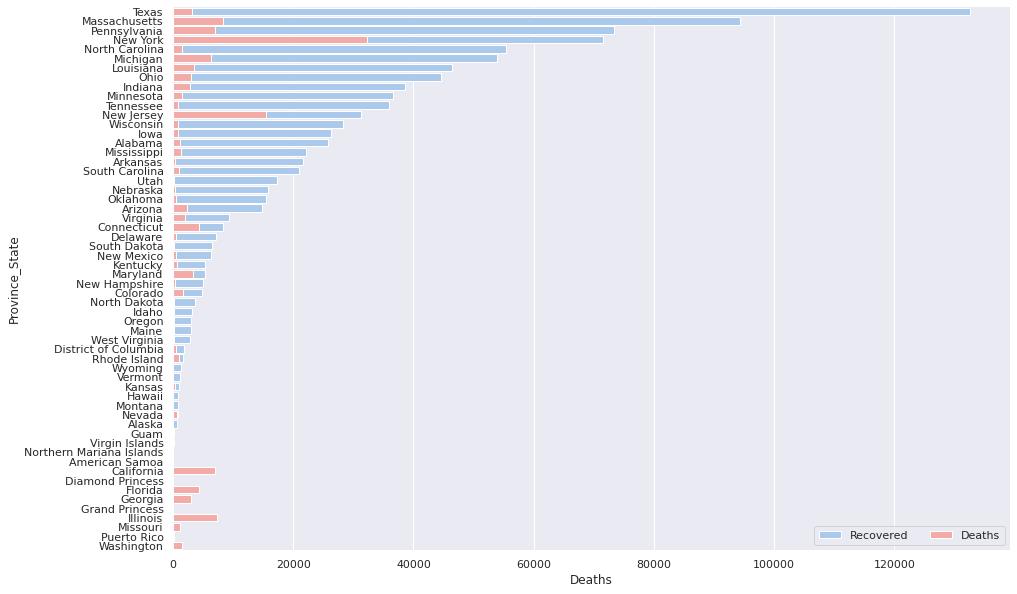

In [ ]:
data = data.sort_values('Recovered',ascending = False)
f, ax = plt.subplots(figsize = (15,10))
sns.set_color_codes('pastel')
sns.barplot(x='Recovered',y='Province_State',data = data,label = 'Recovered', color = 'b', edgecolor = 'w')

sns.barplot(x='Deaths',y='Province_State',data = data,label = "Deaths", color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()


In [ ]:
#extras
aggregated_data= data.groupby("Country_Region").sum()
data.loc["Alaska"].plot()
data.loc["Alaska"].diff().plot()
#max infected rate
data.loc['US'].diff().max()
aggregated_data.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Country_Region,,,,,,,,,,
US,3304942,135205,1006326.0,2163411.0,45474.936674,40282176.0,263651.0,189.343178,649937.486701,393.531647


In [ ]:
#Google drive mounting

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

#Dataset Path
path = '/content/drive/My Drive/Assignment - Data Science/07-12-2020.csv'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Load data in pandas dataframe
data=pd.read_csv(path)
data=data.fillna(0)
data=data.drop(['Lat','Long_','FIPS','UID','ISO3','Last_Update'],axis=1)
data.head(5)

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,US,53587,1121,25783.0,26683.0,1092.901859,511506.0,6745.0,2.091925,10432.117083,12.587008
1,Alaska,US,1479,17,615.0,847.0,202.174849,145475.0,0.0,1.149425,19885.994710,0.000000
2,American Samoa,US,0,0,0.0,0.0,0.000000,816.0,0.0,0.000000,1466.544455,0.000000
3,Arizona,US,122467,2237,14829.0,105401.0,1682.535535,696172.0,5795.0,1.826615,9564.487807,4.731887
4,Arkansas,US,28367,321,21591.0,6455.0,939.988150,382402.0,1822.0,1.131597,12671.532015,6.422956


In [ ]:
# Total confirmed, death and recovered cases in US

aggregated_data= data.groupby("Country_Region").sum()
aggregated_data.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Country_Region,,,,,,,,,,
US,3304942,135205,1006326.0,2163411.0,45474.936674,40282176.0,263651.0,189.343178,649937.486701,393.531647


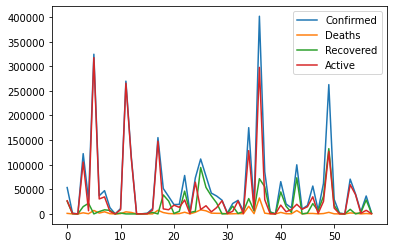

In [ ]:
df = data[data.columns[2:6]]
df.plot()
plt.legend()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


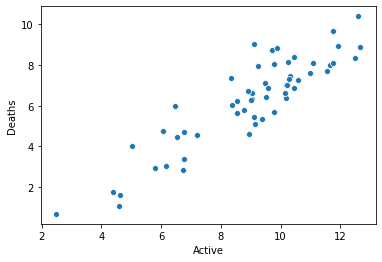

In [ ]:
df.corr()

sns.scatterplot(x=np.log(data['Active']),y=np.log(data['Deaths']))